In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import batman



In [2]:
# Import data

data = np.load('/data/jpr64/rebinned_data_test.npy', allow_pickle = True)

In [3]:
# Importing a real rebinned lightcurves time
index = 4607
time = data[index][:,0]

time_start = time[0]
bins = np.size(time)


In [99]:

# Use batman to create transits
ma = batman.TransitParams()
ma.t0 = time_start  # time of inferior conjunction; first transit is X days after start
ma.per = 5.3 # orbital period
ma.rp = 0.1  # 6371 planet radius (in units of stellar radii)
ma.a = 8.47 # semi-major axis (in units of stellar radii)
ma.inc = 90  # orbital inclination (in degrees)
ma.ecc = 0  # eccentricity
ma.w = 90  # longitude of periastron (in degrees)
ma.u = []  # limb darkening coefficients
ma.limb_dark = "uniform"  # limb darkening model
m = batman.TransitModel(ma, time)  # initializes model
synthetic_signal = m.light_curve(ma)  # calculates light curve

# Create noise and merge with flux

noise_mean_ratio = 0.025
noise = np.random.normal(0, noise_mean_ratio, bins)
y = synthetic_signal + noise


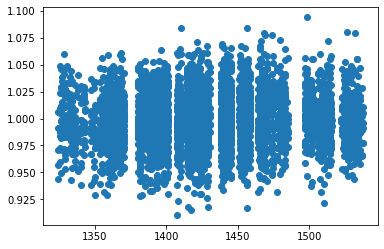

In [100]:
plt.scatter(time, y)

In [101]:
from transitleastsquares import transitleastsquares
model = transitleastsquares(time, y)
results = model.power(period_min = 1, period_max = 12, u = [0], limb_dark = "linear", use_threads = 3)





/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/transitleastsquares/transit.py:157: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lc_arr = numpy.array(lc_arr)
  0%|          | 0/14256 periods | 00:00<?

Transit Least Squares TLS 1.0.26 (20 March 2021)
Creating model cache for 37 durations
Searching 4632 data points, 14256 periods from 1.0 to 12.0 days
Using 3 of 64 CPU threads


100%|██████████| 14256/14256 periods | 03:50<00:00
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jpr64/.conda/envs/orion_jake/lib/python3.7/site-packages/transitleastsquares/main.py:404: UserWarning: 146 of 153 transits without data. The true period may be twice the given period.
  warnings.warn(text)


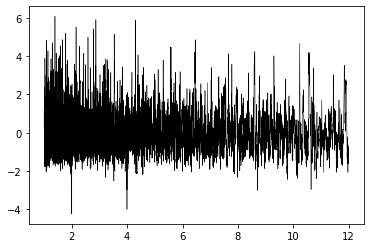

In [102]:
plt.plot(results.periods, results.power, color='black', lw=0.5)


In [103]:
print('Period', format(results.period, '.5f'), 'd')
print(len(results.transit_times), 'transit times in time series:', \
        ['{0:0.5f}'.format(i) for i in results.transit_times])
print('Transit depth', format(results.depth, '.5f'))
print('Best duration (days)', format(results.duration, '.5f'))
print('Signal detection efficiency (SDE):', results.SDE)




Period 1.39000 d
153 transit times in time series: ['1325.24090', '1326.63090', '1328.02091', '1329.41091', '1330.80092', '1332.19092', '1333.58092', '1334.97093', '1336.36093', '1337.75093', '1339.14094', '1340.53094', '1341.92094', '1343.31095', '1344.70095', '1346.09096', '1347.48096', '1348.87096', '1350.26097', '1351.65097', '1353.04097', '1354.43098', '1355.82098', '1357.21099', '1358.60099', '1359.99099', '1361.38100', '1362.77100', '1364.16100', '1365.55101', '1366.94101', '1368.33101', '1369.72102', '1371.11102', '1372.50103', '1373.89103', '1375.28103', '1376.67104', '1378.06104', '1379.45104', '1380.84105', '1382.23105', '1383.62105', '1385.01106', '1386.40106', '1387.79107', '1389.18107', '1390.57107', '1391.96108', '1393.35108', '1394.74108', '1396.13109', '1397.52109', '1398.91109', '1400.30110', '1401.69110', '1403.08111', '1404.47111', '1405.86111', '1407.25112', '1408.64112', '1410.03112', '1411.42113', '1412.81113', '1414.20113', '1415.59114', '1416.98114', '1418.3711

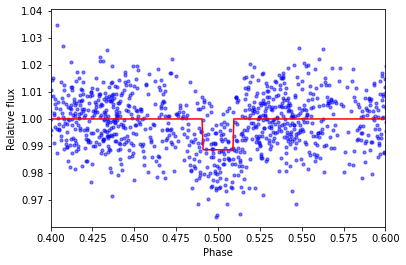

In [23]:
plt.figure()
plt.plot(results.model_folded_phase, results.model_folded_model, color='red')
plt.scatter(results.folded_phase, results.folded_y, color='blue', s=10, alpha=0.5, zorder=2)
plt.xlim(0.4, 0.6)
plt.ticklabel_format(useOffset=False)
plt.xlabel('Phase')
plt.ylabel('Relative flux');

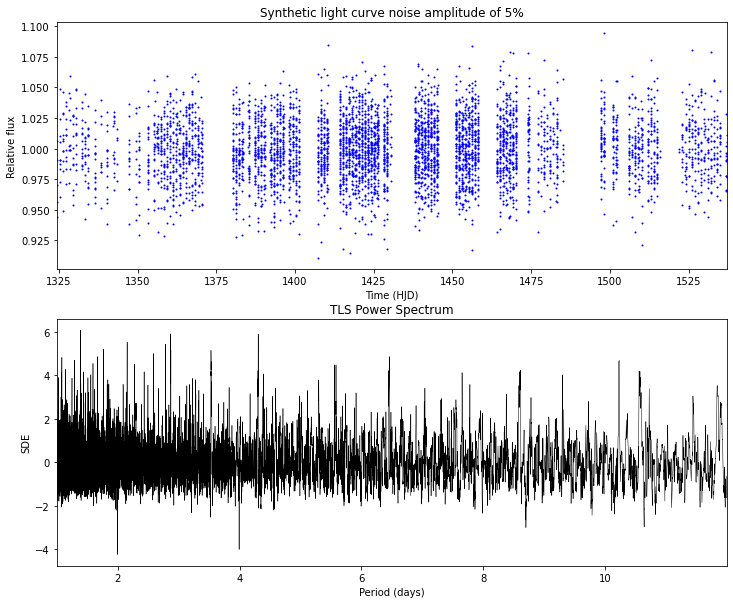

In [105]:
# Plotting for 'noisy' lightcurve

fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(12)

ax1.scatter(time, y, alpha = 1, s=1, color='blue')
ax1.set_title('Synthetic light curve noise amplitude of 5%')
ax1.set_ylabel('Relative flux')
ax1.set_xlabel('Time (HJD)')
ax1.set_xlim(np.min(time), np.max(time))

ax2.plot(results.periods, results.power, color = 'black', linewidth = 0.5)
# for n in range(2, 3):
#     ax2.axvline(results.period / n, alpha=0.4, lw=1, linestyle="dashed")
# for n in range(2,3):
#     ax2.axvline(n*results.period, alpha=0.4, lw=1, linestyle="dashed")

#     ax2.axvline(results.period, alpha=0.4, lw=3)

ax2.set_title('TLS Power Spectrum')
ax2.set_ylabel('SDE')
ax2.set_xlabel('Period (days)')
ax2.set_xlim(np.min(results.periods), np.max(results.periods))

plt.savefig('Synthetic_light_curve_high_noise.png')

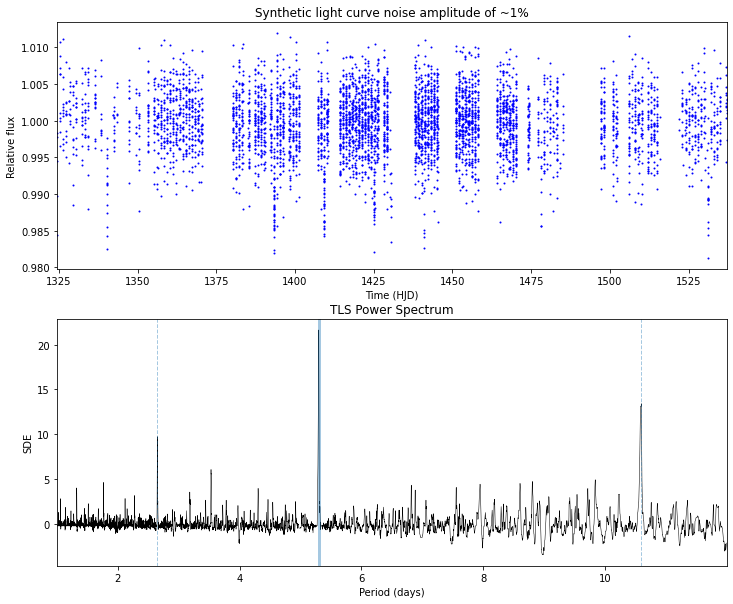

In [88]:
# Plotting for non 'noisy' lightcurve

fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(12)

ax1.scatter(time, y, alpha = 1, s=1, color='blue')
ax1.set_title('Synthetic light curve noise amplitude of ~1%')
ax1.set_ylabel('Relative flux')
ax1.set_xlabel('Time (HJD)')
ax1.set_xlim(np.min(time), np.max(time))

ax2.plot(results.periods, results.power, color = 'black', linewidth = 0.5)
for n in range(2, 3):
    ax2.axvline(results.period / n, alpha=0.4, lw=1, linestyle="dashed")
for n in range(2,3):
    ax2.axvline(n*results.period, alpha=0.4, lw=1, linestyle="dashed")

    ax2.axvline(results.period, alpha=0.4, lw=3)

ax2.set_title('TLS Power Spectrum')
ax2.set_ylabel('SDE')
ax2.set_xlabel('Period (days)')
ax2.set_xlim(np.min(results.periods), np.max(results.periods))

plt.savefig('Synthetic_light_curve_one_noise.png')